In [2]:
import numpy as  np
import os
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [3]:
def logit(z):
    return 1 / (1 + np.exp(-z))

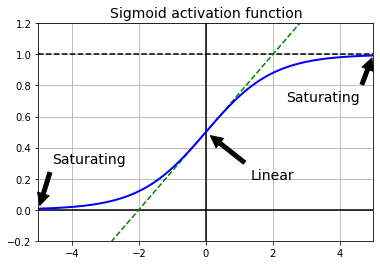

In [4]:
z = np.linspace(-5, 5, 200)

plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [1, 1], 'k--')
plt.plot([0, 0], [-0.2, 1.2], 'k-')
plt.plot([-5, 5], [-3/4, 7/4], 'g--')
plt.plot(z, logit(z), "b-", linewidth=2)
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Saturating', xytext=(3.5, 0.7), xy=(5, 1), arrowprops=props, fontsize=14, ha="center")
plt.annotate('Saturating', xytext=(-3.5, 0.3), xy=(-5, 0), arrowprops=props, fontsize=14, ha="center")
plt.annotate('Linear', xytext=(2, 0.2), xy=(0, 0.5), arrowprops=props, fontsize=14, ha="center")
plt.grid(True)
plt.title("Sigmoid activation function", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])
plt.show()

In [7]:
[name for name in dir(keras.initializers) if not name.startswith('_')]

['Constant',
 'GlorotNormal',
 'GlorotUniform',
 'Identity',
 'Initializer',
 'Ones',
 'Orthogonal',
 'RandomNormal',
 'RandomUniform',
 'TruncatedNormal',
 'VarianceScaling',
 'Zeros',
 'constant',
 'deserialize',
 'get',
 'glorot_normal',
 'glorot_uniform',
 'he_normal',
 'he_uniform',
 'identity',
 'lecun_normal',
 'lecun_uniform',
 'ones',
 'orthogonal',
 'serialize',
 'zeros']

In [8]:
keras.layers.Dense(10, activation="relu", kernel_initializer="he_normal")

In [9]:
init = keras.initializers.VarianceScaling(scale=2.0, mode='fan_avg', distribution='uniform')
keras.layers.Dense(10, activation="relu", kernel_initializer=init)

In [12]:
def leaky_relu(z, alpha=0.01):
    return np.maximum(alpha*z, z)

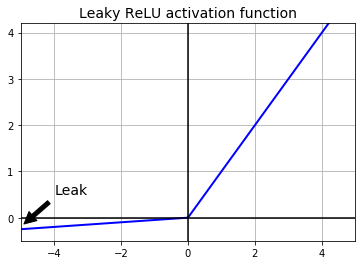

In [13]:
plt.plot(z, leaky_relu(z, 0.05), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([0, 0], [-0.5, 4.2], 'k-')
plt.grid(True)
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Leak', xytext=(-3.5, 0.5), xy=(-5, -0.2), arrowprops=props, fontsize=14, ha="center")
plt.title("Leaky ReLU activation function", fontsize=14)
plt.axis([-5, 5, -0.5, 4.2])
plt.show()

In [14]:
[m for m in dir(keras.activations) if not m.startswith("_")]

['deserialize',
 'elu',
 'exponential',
 'get',
 'hard_sigmoid',
 'linear',
 'relu',
 'selu',
 'serialize',
 'sigmoid',
 'softmax',
 'softplus',
 'softsign',
 'tanh']

In [18]:
[m for m in dir(keras.layers) if 'relu' in m.lower()]

['LeakyReLU', 'PReLU', 'ReLU', 'ThresholdedReLU']

# LeakyReLU

In [19]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [20]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(10, activation="softmax")
])

In [21]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

In [22]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 27s 488us/sample - loss: 1.2767 - accuracy: 0.6049 - val_loss: 0.8772 - val_accuracy: 0.7230
Epoch 2/10
55000/55000 [==============================] - 20s 355us/sample - loss: 0.7931 - accuracy: 0.7437 - val_loss: 0.7121 - val_accuracy: 0.7658
Epoch 3/10
55000/55000 [==============================] - 21s 375us/sample - loss: 0.6826 - accuracy: 0.7744 - val_loss: 0.6346 - val_accuracy: 0.7926
Epoch 4/10
55000/55000 [==============================] - 20s 358us/sample - loss: 0.6245 - accuracy: 0.7923 - val_loss: 0.5905 - val_accuracy: 0.8060
Epoch 5/10
55000/55000 [==============================] - 19s 351us/sample - loss: 0.5864 - accuracy: 0.8048 - val_loss: 0.5591 - val_accuracy: 0.8166
Epoch 6/10
55000/55000 [==============================] - 19s 339us/sample - loss: 0.5594 - accuracy: 0.8132 - val_loss: 0.5408 - val_accuracy: 0.8164
Epoch 7/10
55000/55000 [=====================

# PReLU

In [23]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(10, activation="softmax")
])

In [24]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 23s 409us/sample - loss: 1.4002 - accuracy: 0.5795 - val_loss: 0.9519 - val_accuracy: 0.6902
Epoch 2/10
55000/55000 [==============================] - 21s 383us/sample - loss: 0.8478 - accuracy: 0.7165 - val_loss: 0.7519 - val_accuracy: 0.7500
Epoch 3/10
55000/55000 [==============================] - 21s 379us/sample - loss: 0.7183 - accuracy: 0.7615 - val_loss: 0.6684 - val_accuracy: 0.7734
Epoch 4/10
55000/55000 [==============================] - 21s 377us/sample - loss: 0.6521 - accuracy: 0.7836 - val_loss: 0.6183 - val_accuracy: 0.7944
Epoch 5/10
55000/55000 [==============================] - 20s 361us/sample - loss: 0.6090 - accuracy: 0.7977 - val_loss: 0.5824 - val_accuracy: 0.8070
Epoch 6/10
55000/55000 [==============================] - 19s 347us/sample - loss: 0.5777 - accuracy: 0.8084 - val_loss: 0.5565 - val_accuracy: 0.8196
Epoch 7/10
55000/55000 [=====================

# ELU

In [26]:
def elu(z, alpha=1):
    return np.where(z<0, alpha*(np.exp(z)-1), z)

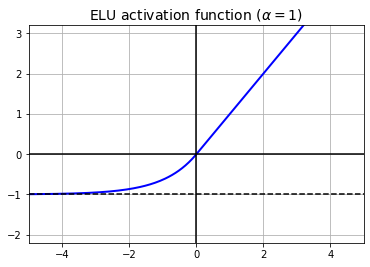

In [27]:
plt.plot(z, elu(z), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1, -1], 'k--')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.title(r"ELU activation function ($\alpha=1$)", fontsize=14)
plt.axis([-5, 5, -2.2, 3.2])
plt.show()

In [28]:
keras.layers.Dense(10, activation="elu")

# SELU

In [31]:
from scipy.special import erfc

alpha_0_1 = -np.sqrt(2 / np.pi) / (erfc(1/np.sqrt(2)) * np.exp(1/2) - 1)
scale_0_1 = (1 - erfc(1 / np.sqrt(2)) * np.sqrt(np.e)) * np.sqrt(2 * np.pi) * (2 * erfc(np.sqrt(2))*np.e**2 + np.pi*erfc(1/np.sqrt(2))**2*np.e - 2*(2+np.pi)*erfc(1/np.sqrt(2))*np.sqrt(np.e)+np.pi+2)**(-1/2)

In [32]:
def selu(z, scale=scale_0_1, alpha=alpha_0_1):
    return scale * elu(z, alpha)

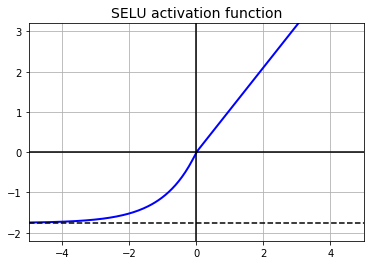

In [33]:
plt.plot(z, selu(z), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1.758, -1.758], 'k--')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.title("SELU activation function", fontsize=14)
plt.axis([-5, 5, -2.2, 3.2])
plt.show()

In [34]:
Z = np.random.normal(size=(500, 100))
for layer in range(1000):
    W = np.random.normal(size=(100, 100), scale=np.sqrt(1 / 100))
    Z = selu(np.dot(Z, W))
    means = np.mean(Z, axis=0).mean()
    stds = np.std(Z, axis=0).mean()
    if layer % 100 == 0:
        print("Layer {}: mean {:.2f}, std deviation {:.2f}".format(layer, means, stds))

Layer 0: mean 0.00, std deviation 1.00
Layer 100: mean -0.01, std deviation 0.93
Layer 200: mean -0.00, std deviation 0.88
Layer 300: mean 0.06, std deviation 0.90
Layer 400: mean 0.00, std deviation 0.90
Layer 500: mean 0.04, std deviation 0.89
Layer 600: mean -0.02, std deviation 0.92
Layer 700: mean -0.03, std deviation 0.92
Layer 800: mean 0.01, std deviation 0.92
Layer 900: mean -0.06, std deviation 0.91


In [35]:
keras.layers.Dense(10, activation="selu",
                   kernel_initializer="lecun_normal")

In [36]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="selu",
                             kernel_initializer="lecun_normal"))
for layer in range(99):
    model.add(keras.layers.Dense(100, activation="selu",
                                 kernel_initializer="lecun_normal"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [37]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

In [38]:
pixel_means = X_train.mean(axis=0, keepdims=True)
pixel_stds = X_train.std(axis=0, keepdims=True)
X_train_scaled = (X_train - pixel_means) / pixel_stds
X_valid_scaled = (X_valid - pixel_means) / pixel_stds
X_test_scaled = (X_test - pixel_means) / pixel_stds

In [39]:
history = model.fit(X_train_scaled, y_train, epochs=5,
                    validation_data=(X_valid_scaled, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/5
55000/55000 [==============================] - 175s 3ms/sample - loss: 1.2612 - accuracy: 0.5145 - val_loss: 1.2832 - val_accuracy: 0.4502
Epoch 2/5
55000/55000 [==============================] - 153s 3ms/sample - loss: 1.0570 - accuracy: 0.6001 - val_loss: 1.0423 - val_accuracy: 0.6050
Epoch 3/5
55000/55000 [==============================] - 154s 3ms/sample - loss: 0.7249 - accuracy: 0.7344 - val_loss: 0.6428 - val_accuracy: 0.7726
Epoch 4/5
55000/55000 [==============================] - 145s 3ms/sample - loss: 0.5995 - accuracy: 0.7868 - val_loss: 0.6303 - val_accuracy: 0.7858
Epoch 5/5
55000/55000 [==============================] - 148s 3ms/sample - loss: 0.6950 - accuracy: 0.7482 - val_loss: 0.7687 - val_accuracy: 0.7020


In [40]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu", kernel_initializer="he_normal"))
for layer in range(99):
    model.add(keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [41]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

history = model.fit(X_train_scaled, y_train, epochs=5,
                    validation_data=(X_valid_scaled, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/5
55000/55000 [==============================] - 109s 2ms/sample - loss: 1.9702 - accuracy: 0.2495 - val_loss: 1.8163 - val_accuracy: 0.3086
Epoch 2/5
55000/55000 [==============================] - 97s 2ms/sample - loss: 1.4947 - accuracy: 0.4038 - val_loss: 1.2617 - val_accuracy: 0.4256
Epoch 3/5
55000/55000 [==============================] - 95s 2ms/sample - loss: 1.0132 - accuracy: 0.5799 - val_loss: 0.8759 - val_accuracy: 0.6272
Epoch 4/5
55000/55000 [==============================] - 92s 2ms/sample - loss: 1.0889 - accuracy: 0.5585 - val_loss: 1.2825 - val_accuracy: 0.4934
Epoch 5/5
55000/55000 [==============================] - 109s 2ms/sample - loss: 1.0008 - accuracy: 0.6114 - val_loss: 0.8360 - val_accuracy: 0.7088


# Batch-Normalization